In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import math
import missingno as msno

# Funciones de Soporte (Helpers)

In [59]:
def map_languages(row) -> pd.Series:
    """
    En este método vamos a emular un OneHot encoding pero a mano.
    Recibe como parámetro el registro y devuelve el nuevo registro actualizado
    """
    # print(row['lenguajes_array'])
    languages = (row['lenguajes_array'])
    errors = 0
    try:
      for l in languages:
        if l != '':
          row[str.lower(l)] = 1
        else:
          errors += 1 # El lenguaje es '' string :(
    except:
      errors += 1

    # print('Count Errors:', errors)
    return row

# Trabajo Final

### Hipótesis

- Pregunta #1: Que salario o rango debería asignarle basado en mis variables?
    - Años de Experiencia / Seniority
    - Tecnologías (Lenguajes de Programación)
    - Lugar de Residencia
    - Dedicación
    - Estudios alcanzados
    - Posición
    - Tipo de Contrato
- Hipotesis #1:

## Limpeza de Datos y Armado de DataSet (Data Wrangling)

In [60]:
# tomamos el DataSet y hacemos un poco de limpieza
#   -> Renombrar columnas para mejorar su legibilidad
#   -> Removemos algunas columnas que no son necesarios

df_salary = pd.read_csv('./datasets/encuesta-salarial-2024.csv', skiprows=0,
                        thousands=".",
                        decimal=",",)
df_salary.rename(columns={'Unnamed: 0': 'indice', '_sal': 'salario', \
    'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual': 'lenguajes', \
    'donde_estas_trabajando': 'lugar_residencia', 'trabajo_de': 'posicion'}, inplace=True)
df_salary.drop(columns={'indice'}, inplace=True)

df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 48 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   lugar_residencia                                                                      5490 non-null   object 
 1   dedicacion                                                                            5490 non-null   object 
 2   tipo_de_contrato                                                                      5490 non-null   object 
 3   ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos                             5490 non-null   int64  
 4   ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos                              5214 non-null   float64
 5   pagos_en_dolares                                                                   

In [61]:
# Removemos algunas columnas que no vamos a tener en cuenta
df_salary.drop(columns={
    'bases_de_datos',
    'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos',
    'pagos_en_dolares',
    'si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron',
    'recibis_algun_tipo_de_bono',
    'a_que_esta_atado_el_bono',
    'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024',
    'de_que_fue_el_ajuste_total_acumulado',
    'en_que_mes_fue_el_ultimo_ajuste',
    'como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior',
    'contas_con_beneficios_adicionales',
    'que_tan_conforme_estas_con_tus_ingresos_laborales',
    'estas_buscando_trabajo',
    # 'donde_estas_trabajando',
    'antiguedad_en_la_empresa_actual',
    'cuantas_personas_tenes_a_cargo',
    'plataformas_que_utilizas_en_tu_puesto_actual',
    'frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual',
    'qa_testing',
    'cantidad_de_personas_en_tu_organizacion',
    'modalidad_de_trabajo',
    'si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina',
    'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales',
    'en_los_ultimos_6_meseshubo_reduccion_de_personal',
    'la_recomendas_como_un_buen_lugar_para_trabajar',
    'que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo',
    'anos_en_el_puesto_actual',
    'salir_o_seguir_contestando',
    'estado',
    'carrera',
    'institucion_educativa',
    'salir_o_seguir_contestando_sobre_las_guardias',
    'tenes_guardias',
    'cuanto_cobras_por_guardia',
    'aclara_el_numero_que_ingresaste_en_el_campo_anterior',
    'salir_o_seguir_contestando_sobre_estudios',
    'tengo_edad',
    'genero',
    'sueldo_dolarizado'
}, inplace=True)

df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   lugar_residencia          5490 non-null   object
 1   dedicacion                5490 non-null   object
 2   tipo_de_contrato          5490 non-null   object
 3   posicion                  5490 non-null   object
 4   anos_de_experiencia       5490 non-null   int64 
 5   lenguajes                 5488 non-null   object
 6   maximo_nivel_de_estudios  2567 non-null   object
 7   seniority                 5490 non-null   object
 8   salario                   5490 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 386.1+ KB


In [62]:
# Categorizar columnas
#   -> Dedicación
#   -> TipoDeContrato
#   -> MaximoNivelDeEstudio
#   -> Seniority
df_salary['dedicacion'] = df_salary['dedicacion'].astype('category')
df_salary['tipo_de_contrato'] = df_salary['tipo_de_contrato'].astype('category')
df_salary['maximo_nivel_de_estudios'] = df_salary['maximo_nivel_de_estudios'].astype('category')
df_salary['seniority'] = df_salary['seniority'].astype('category')
df_salary['lugar_residencia'] = df_salary['lugar_residencia'].astype('category')

df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   lugar_residencia          5490 non-null   category
 1   dedicacion                5490 non-null   category
 2   tipo_de_contrato          5490 non-null   category
 3   posicion                  5490 non-null   object  
 4   anos_de_experiencia       5490 non-null   int64   
 5   lenguajes                 5488 non-null   object  
 6   maximo_nivel_de_estudios  2567 non-null   category
 7   seniority                 5490 non-null   category
 8   salario                   5490 non-null   int64   
dtypes: category(5), int64(2), object(2)
memory usage: 200.0+ KB


In [63]:
# Reemplazo los NaN en MaximoNivelDeEstudios por SecundarioCompleto
df_salary['maximo_nivel_de_estudios'].unique()
df_salary['maximo_nivel_de_estudios'] = df_salary['maximo_nivel_de_estudios'].fillna('Secundario')
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   lugar_residencia          5490 non-null   category
 1   dedicacion                5490 non-null   category
 2   tipo_de_contrato          5490 non-null   category
 3   posicion                  5490 non-null   object  
 4   anos_de_experiencia       5490 non-null   int64   
 5   lenguajes                 5488 non-null   object  
 6   maximo_nivel_de_estudios  5490 non-null   category
 7   seniority                 5490 non-null   category
 8   salario                   5490 non-null   int64   
dtypes: category(5), int64(2), object(2)
memory usage: 200.0+ KB


In [64]:
# Filtramos posiciones relacionadas a desarrollo web

profession_filter = ['Developer', 'Technical Leader', 'Data Engineer', 'Automatizador', \
    'Consultant', 'Data Scientist', 'Architect', 'Engineer', 'Machine Learning Engineer', \
        'Analista Senior en Informatica', 'AI Engineer', 'Operaciones', \
            'Hago desde el análisis y la programación. Diseño de DB, etc', 'Analista Tecnico Funcional', \
                'Ingenieria Electronica', 'Técnico en informática']

df_salary.where(df_salary['posicion'].isin(profession_filter), inplace=True)

# Reindexamos para evitar problemas de índice
df_salary = df_salary.dropna().reset_index(drop=True)
df_salary.tail()


,lugar_residencia,dedicacion,tipo_de_contrato,posicion,anos_de_experiencia,lenguajes,maximo_nivel_de_estudios,seniority,salario
2953,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Data Engineer,5.0,"Bash/Shell, Python, Scala",Universitario,Semi-Senior,2200000.0
2954,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),Developer,4.0,"Bash/Shell, CSS, HTML, Java, Javascript, Scala...",Universitario,Semi-Senior,1700000.0
2955,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,Developer,5.0,"CSS, HTML, Javascript, TypeScript",Terciario,Semi-Senior,2500000.0
2956,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Technical Leader,30.0,SQL,Secundario,Senior,4000000.0
2957,Buenos Aires,Full-Time,Staff (planta permanente),Developer,5.0,"HTML, Javascript, PHP, Rust, SQL",Secundario,Semi-Senior,1290000.0


In [65]:
# Actualmente los lenguajes de programación vienen en un string separados por coma y espacio (', '); por ende, vamos a separarlos en un array y 
# usarlos como columnas

# Para ello:
# Spliteamos los lenguajes de programación en un array dentro de la columna nueva lenguajes_array
df_salary['lenguajes_array'] = df_salary['lenguajes'] \
    .apply(func=(lambda x: str(x).split(', ')))

# Con este pedazo de código lo que hacemos es crear las columnas de los lenguajes de programación,
# además lo limpiamos un poco
languages_list = df_salary['lenguajes_array'].to_list()

df_languages = pd.DataFrame(languages_list)
unique_languages = pd.unique(np.char.lower(df_languages.stack().to_numpy().tolist()))

df_unique_languages = pd.DataFrame(unique_languages).replace('', np.nan).dropna()
unique_languages_list = pd.unique(np.char.lower(df_unique_languages.stack().to_numpy().tolist()))

lenguages_columns_length = unique_languages_list.shape[0]
lenguages_rows_length = df_salary.shape[0]

languages_df = pd.DataFrame(np.zeros((lenguages_rows_length, lenguages_columns_length)), columns=unique_languages_list)
final_df = pd.concat([df_salary, languages_df], axis=1)

In [66]:
# Aplicamos la función map_languages, que simula un OneHotEncoder a mano
final_df_encoded = final_df.apply(map_languages, axis=1)

# Mostramos un poco los resultados...
final_df_encoded[['lenguajes', 'html', 'javascript', 'c#', 'seniority', 'anos_de_experiencia', 'tipo_de_contrato', 'salario']].head()

# Creo un nuevo CSV con las columnas para verlas mejor y poder elegir cual eliminar y cual no
# df_columns_to_clean = final_df_encoded.columns.to_frame()
# df_columns_to_clean.to_csv('./datasets/coolumns_for_cleaning.csv')

# Elimino nuevamente algunas columnas que considero "no útiles"
final_df_encoded.drop(columns={
    'ninguno de los anteriores',
    'relacionados a salesforce: apex',
    'una poronga',
    'sap pi po is',
    'tal',
    'edi',
    'microsoft excel',
    'openedge abl',
    'soql ',
    'no trabajo con lenguajes sino que realizo diseño de arquitecturas a alto nivel',
    'no hago programacion',
    'wikimedia',
    'actualmente me encuentro entre asignaciones',
    'pero mi perfil en la empresa es de java y angularts',
    'vb .net  y vb .6',
    'lenguajes', 
    'lenguajes_array'
}, inplace=True)

# Vuelvo a Eliminar NaN en caso de que me hayan quedado
final_df_encoded = final_df_encoded.dropna().reset_index(drop=True)


## Informe sobre el DataSet ya limpio

In [67]:
# Asignación
df = final_df_encoded

In [68]:
# Forma
print(df.shape)

(2958, 125)


In [69]:
# Describimos el DataSet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anos_de_experiencia,2958.0,7.323191e+00,6.625981e+00,0.0,3.0,5.0,10.0,3.900000e+01
salario,2958.0,6.130852e+06,3.502636e+07,120000.0,1150000.0,1850000.0,3000000.0,1.105953e+09
html,2958.0,3.820149e-01,4.859623e-01,0.0,0.0,0.0,1.0,1.000000e+00
javascript,2958.0,5.463151e-01,4.979345e-01,0.0,0.0,1.0,1.0,1.000000e+00
php,2958.0,1.260987e-01,3.320167e-01,0.0,0.0,0.0,0.0,1.000000e+00
...,...,...,...,...,...,...,...,...
sqr,2958.0,3.380663e-04,1.838658e-02,0.0,0.0,0.0,0.0,1.000000e+00
vbscript,2958.0,3.380663e-04,1.838658e-02,0.0,0.0,0.0,0.0,1.000000e+00
blue prism,2958.0,3.380663e-04,1.838658e-02,0.0,0.0,0.0,0.0,1.000000e+00
poweshell,2958.0,3.380663e-04,1.838658e-02,0.0,0.0,0.0,0.0,1.000000e+00


In [70]:
# Perimeros 10 Registros
df.head(10)

,lugar_residencia,dedicacion,tipo_de_contrato,posicion,anos_de_experiencia,maximo_nivel_de_estudios,seniority,salario,html,javascript,...,rexx,ssis,graphql,mulesoft,iron python,sqr,vbscript,blue prism,poweshell,classic asp
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Developer,3.0,Posgrado/Especialización,Semi-Senior,1700000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Buenos Aires,Full-Time,Staff (planta permanente),Technical Leader,3.0,Universitario,Semi-Senior,2000000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Córdoba,Full-Time,Contractor,Data Engineer,5.0,Universitario,Semi-Senior,1000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Developer,9.0,Secundario,Senior,850000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,Technical Leader,5.0,Secundario,Semi-Senior,3300000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Córdoba,Full-Time,Contractor,Automatizador,0.0,Secundario,Junior,450000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Córdoba,Full-Time,Staff (planta permanente),Technical Leader,9.0,Universitario,Senior,835469.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Buenos Aires,Full-Time,Contractor,Technical Leader,3.0,Universitario,Semi-Senior,1050000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Developer,4.0,Secundario,Semi-Senior,860000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Corrientes,Full-Time,Contractor,Developer,15.0,Posgrado/Especialización,Senior,4000000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Últimos 10 Registros
df.tail(10)

,lugar_residencia,dedicacion,tipo_de_contrato,posicion,anos_de_experiencia,maximo_nivel_de_estudios,seniority,salario,html,javascript,...,rexx,ssis,graphql,mulesoft,iron python,sqr,vbscript,blue prism,poweshell,classic asp
2948,Santa Fe,Full-Time,Staff (planta permanente),Technical Leader,4.0,Universitario,Semi-Senior,1768000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2949,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Data Engineer,3.0,Secundario,Semi-Senior,1534351.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2950,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Developer,2.0,Universitario,Junior,797000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2951,Córdoba,Full-Time,Staff (planta permanente),Architect,3.0,Secundario,Semi-Senior,3000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,Mendoza,Full-Time,Staff (planta permanente),Data Engineer,0.0,Universitario,Junior,750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2953,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Data Engineer,5.0,Universitario,Semi-Senior,2200000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2954,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),Developer,4.0,Universitario,Semi-Senior,1700000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,Developer,5.0,Terciario,Semi-Senior,2500000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2956,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Technical Leader,30.0,Secundario,Senior,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2957,Buenos Aires,Full-Time,Staff (planta permanente),Developer,5.0,Secundario,Semi-Senior,1290000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

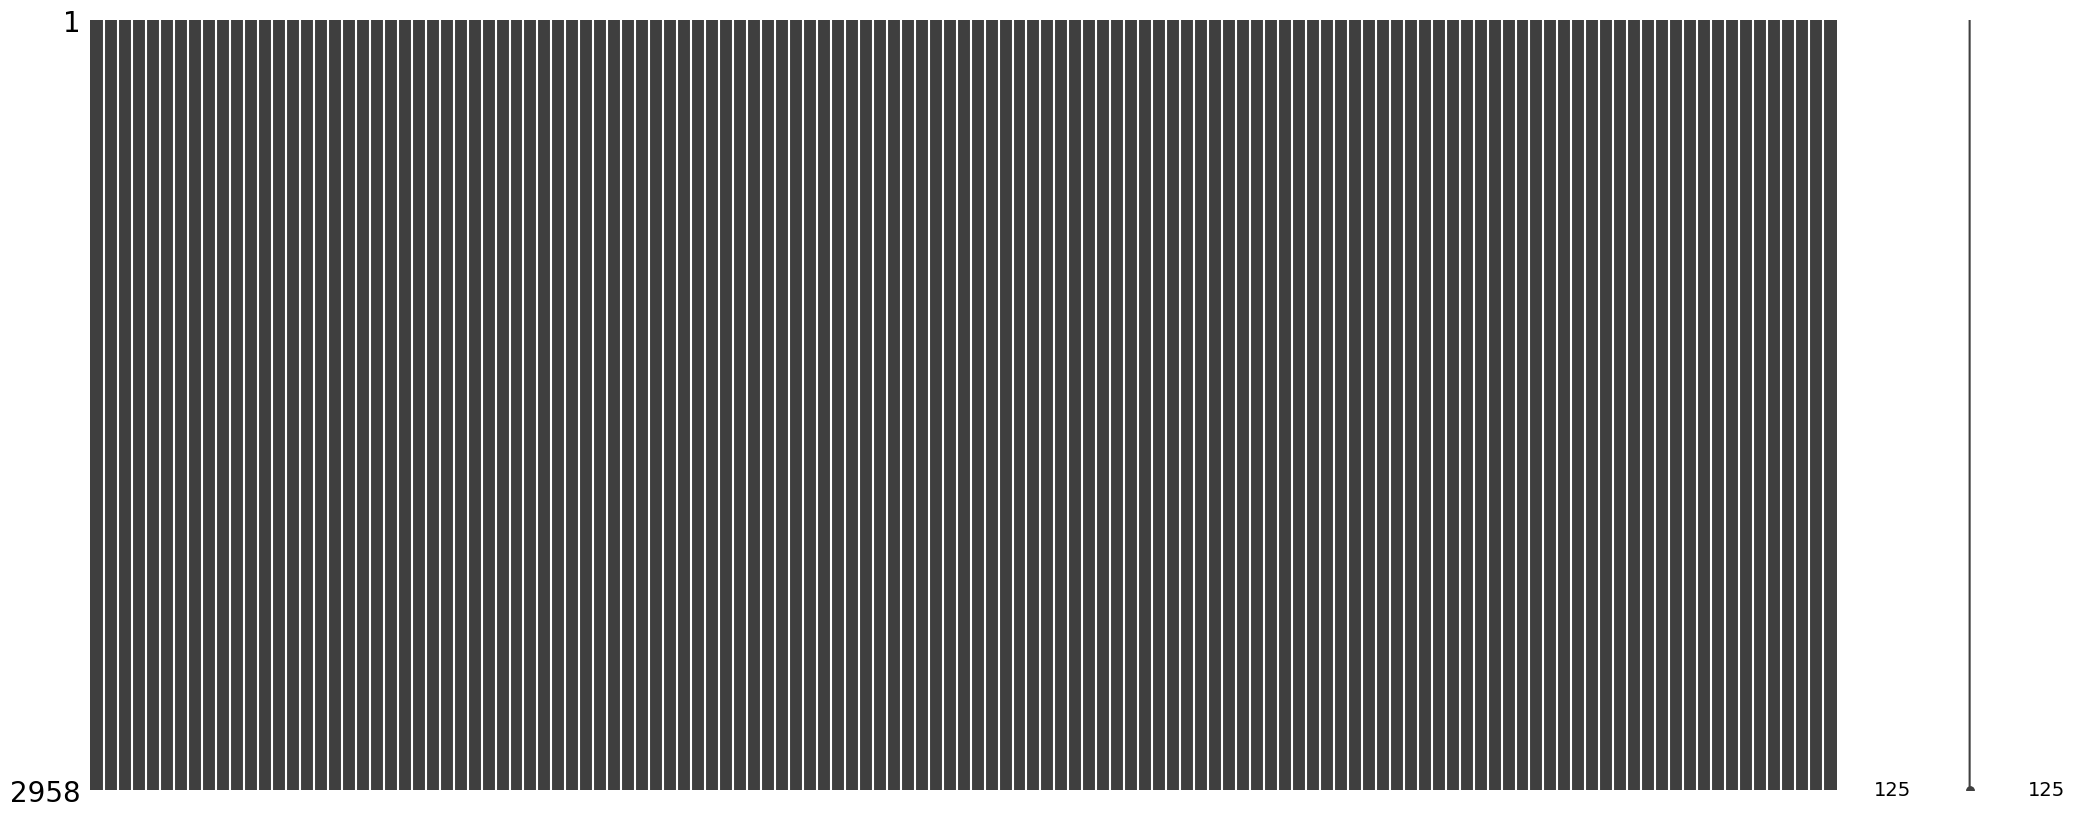

In [72]:
# Mostramos que no hay valores nulos o vacíos
msno.matrix(df)

In [73]:
# Algunas columnas
print(df.columns)

Index(['lugar_residencia', 'dedicacion', 'tipo_de_contrato', 'posicion',
       'anos_de_experiencia', 'maximo_nivel_de_estudios', 'seniority',
       'salario', 'html', 'javascript',
       ...
       'rexx', 'ssis', 'graphql', 'mulesoft ', 'iron python', 'sqr',
       'vbscript', 'blue prism', 'poweshell', 'classic asp'],
      dtype='object', length=125)


## Análisis de variables Categóricas

- Por cada variable categórica mostramos la cantidad de dichas ocurrencias
- Además usamos Scatterplot para mostrar la distribución de los valores por cada categoría

In [74]:
# Creamos un DF de soporte para poder mostrar los valores de Salario expresado en $1.000.000
df_copy = df
df_copy['salario_en_millones'] = df_copy['salario'] / 1000000
df_copy[['salario', 'salario_en_millones']]

,salario,salario_en_millones
0,1700000.0,1.70
1,2000000.0,2.00
2,1000000.0,1.00
3,850000.0,0.85
4,3300000.0,3.30
...,...,...
2953,2200000.0,2.20
2954,1700000.0,1.70
2955,2500000.0,2.50
2956,4000000.0,4.00


### Variable: Lugar de Residencia

In [75]:
df['lugar_residencia'].value_counts()

lugar_residencia
Ciudad Autónoma de Buenos Aires    1354
Buenos Aires                        702
Córdoba                             270
Santa Fe                            199
Mendoza                             112
Entre Ríos                           51
Tucumán                              33
Misiones                             28
Chaco                                26
Neuquén                              22
San Juan                             20
Corrientes                           20
Salta                                20
San Luis                             18
Río Negro                            18
Chubut                               16
Jujuy                                13
Santiago del Estero                   9
La Rioja                              7
Formosa                               5
La Pampa                              5
Tierra del Fuego                      4
Catamarca                             3
Santa Cruz                            3
Name: count, dtype: int

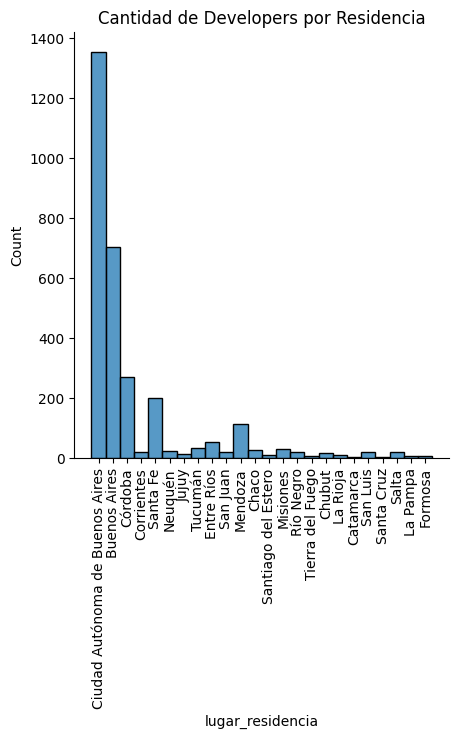

In [76]:
ax = sns.displot(data=df['lugar_residencia'])
ax.tick_params(axis='x', rotation=90)
plt.title('Cantidad de Developers por Residencia')
plt.show()

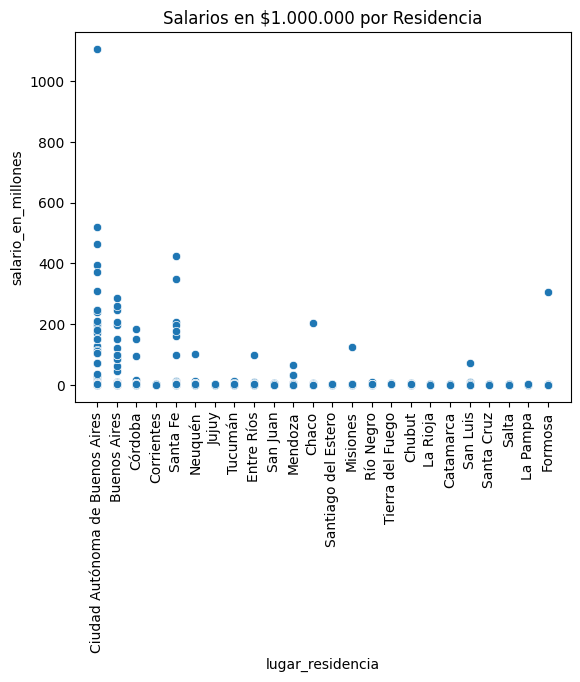

In [77]:
#Scatterplot
ax = sns.scatterplot(df_copy, x='lugar_residencia', y='salario_en_millones')
ax.tick_params(axis='x', rotation=90)
plt.title('Salarios en $1.000.000 por Residencia')
plt.show()

### Variable:Seniority

In [78]:
print(df['seniority'].value_counts())

seniority
Senior         1295
Semi-Senior    1004
Junior          659
Name: count, dtype: int64


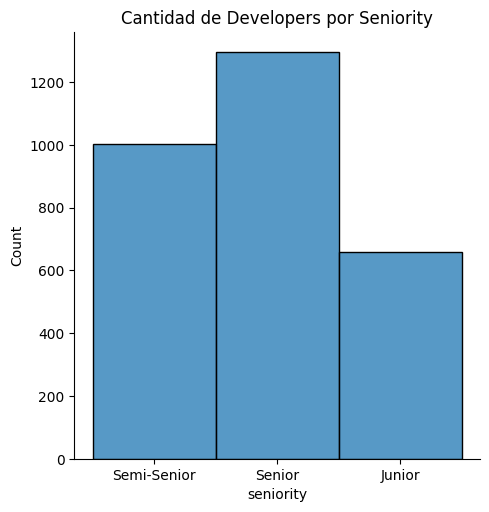

In [79]:
ax = sns.displot(data=df['seniority'])
plt.title('Cantidad de Developers por Seniority')
plt.show()

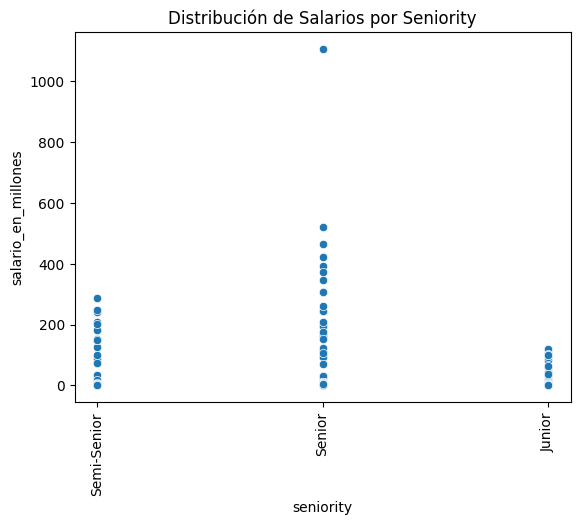

In [80]:
ax = sns.scatterplot(df, x='seniority', y='salario_en_millones')
ax.tick_params(axis='x', rotation=90)
plt.title('Distribución de Salarios por Seniority')
plt.show()

### Variable: Dedicación

In [81]:
print(df['dedicacion'].value_counts())

dedicacion
Full-Time    2804
Part-Time     154
Name: count, dtype: int64


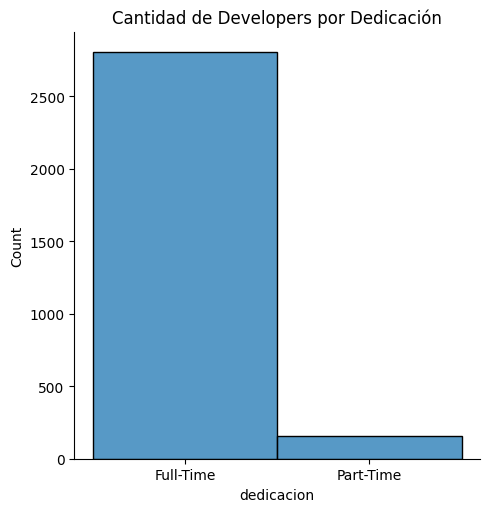

In [82]:
ax = sns.displot(data=df['dedicacion'])
plt.title('Cantidad de Developers por Dedicación')
plt.show()

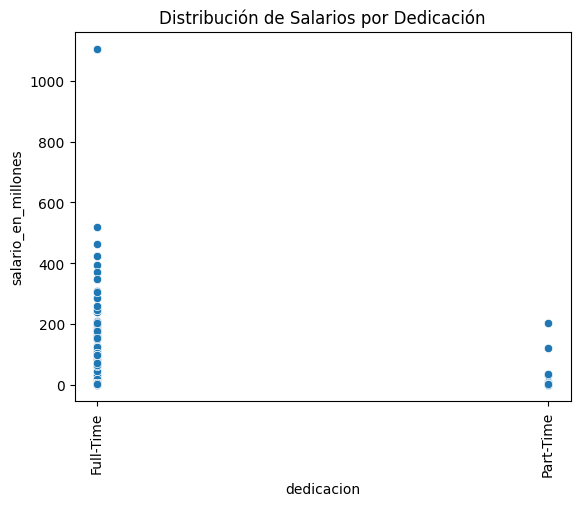

In [83]:
ax = sns.scatterplot(df, x='dedicacion', y='salario_en_millones')
ax.tick_params(axis='x', rotation=90)
plt.title('Distribución de Salarios por Dedicación')
plt.show()

### Variable: Tipo de Contrato

In [84]:
print(df['tipo_de_contrato'].value_counts())

tipo_de_contrato
Staff (planta permanente)                                 2045
Contractor                                                 573
Tercerizado (trabajo a través de consultora o agencia)     241
Freelance                                                   77
Participación societaria en una cooperativa                 22
Name: count, dtype: int64


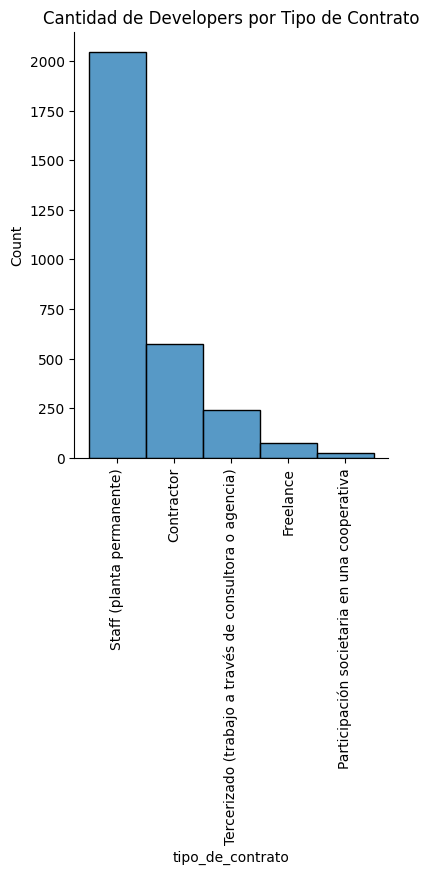

In [85]:
ax = sns.displot(data=df['tipo_de_contrato'])
ax.tick_params(axis='x', rotation=90)
plt.title('Cantidad de Developers por Tipo de Contrato')
plt.show()

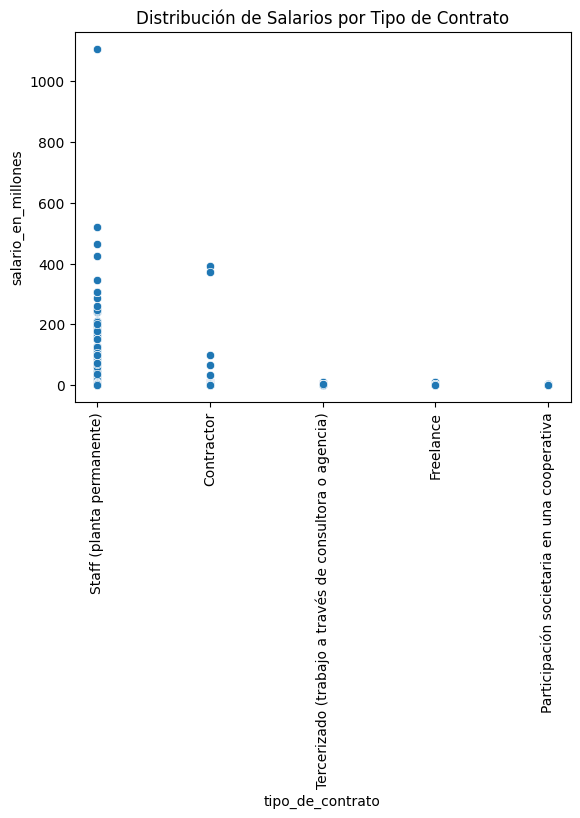

In [86]:
ax = sns.scatterplot(df, x='tipo_de_contrato', y='salario_en_millones')
ax.tick_params(axis='x', rotation=90)
plt.title('Distribución de Salarios por Tipo de Contrato')
plt.show()

### Variable: Máximo nivel de Estudio alcanzado

In [87]:
print(df['maximo_nivel_de_estudios'].value_counts())

maximo_nivel_de_estudios
Secundario                  1576
Universitario               1047
Terciario                    223
Maestría                      47
Posgrado/Especialización      44
Doctorado                     15
Posdoctorado                   5
Primario                       1
Name: count, dtype: int64


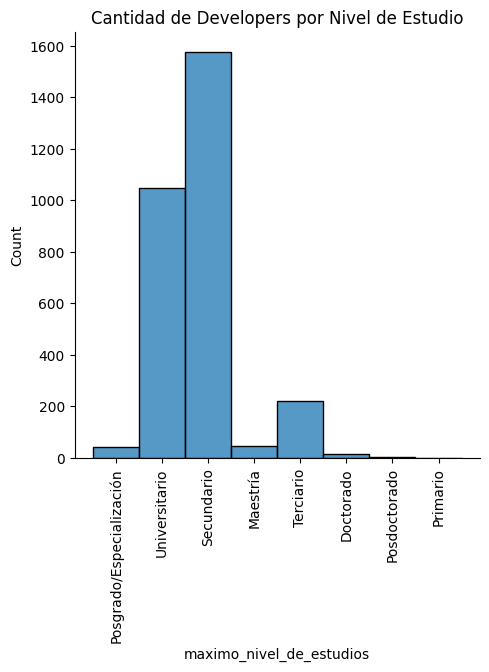

In [88]:
ax = sns.displot(data=df['maximo_nivel_de_estudios'])
ax.tick_params(axis='x', rotation=90)
plt.title('Cantidad de Developers por Nivel de Estudio')
plt.show()

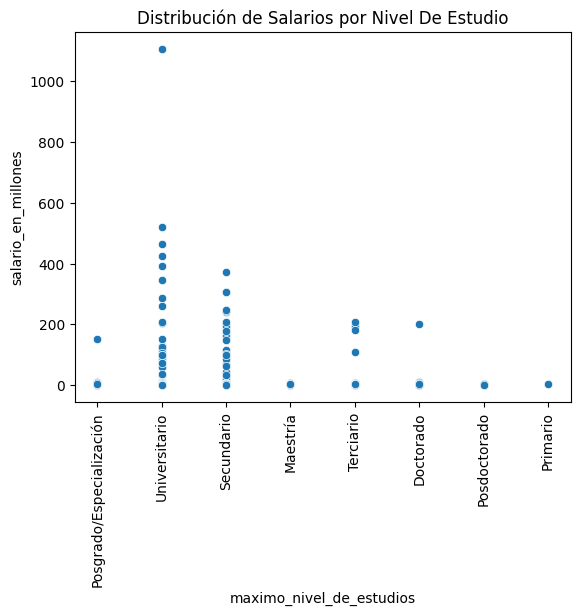

In [89]:
ax = sns.scatterplot(df, x='maximo_nivel_de_estudios', y='salario_en_millones')
ax.tick_params(axis='x', rotation=90)
plt.title('Distribución de Salarios por Nivel De Estudio')
plt.show()

### Variable: Años de Experiencia

In [90]:
print(df['anos_de_experiencia'].value_counts())

anos_de_experiencia
3.0     460
2.0     402
5.0     275
4.0     269
6.0     169
1.0     157
10.0    144
15.0    138
7.0     129
20.0    111
8.0     106
0.0     100
9.0      69
12.0     68
16.0     48
14.0     46
18.0     42
13.0     34
25.0     34
17.0     33
30.0     21
11.0     21
19.0     17
22.0     10
24.0      9
26.0      8
21.0      8
35.0      6
28.0      5
27.0      5
23.0      4
32.0      3
39.0      2
34.0      1
36.0      1
33.0      1
38.0      1
29.0      1
Name: count, dtype: int64


<Figure size 1200x2400 with 0 Axes>

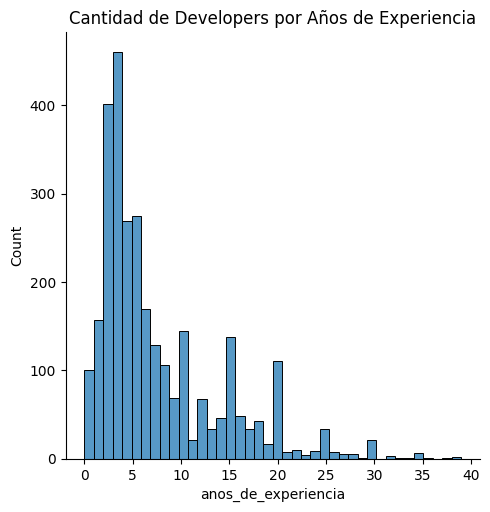

In [91]:
plt.figure(dpi = 120, figsize= (10,20))
sns.displot(data=df['anos_de_experiencia'])
plt.title('Cantidad de Developers por Años de Experiencia')
plt.show()

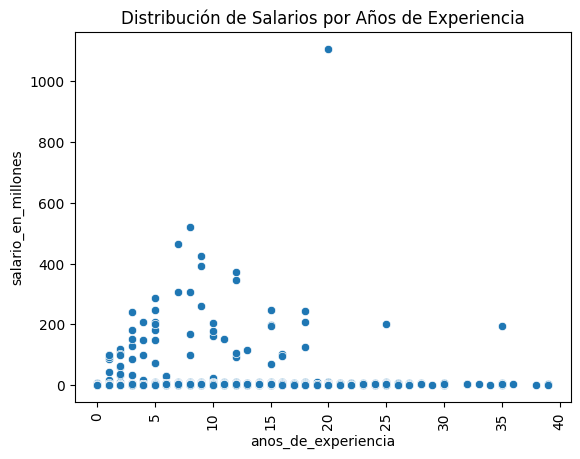

In [92]:
ax = sns.scatterplot(df, x='anos_de_experiencia', y='salario_en_millones')
ax.tick_params(axis='x', rotation=90)
plt.title('Distribución de Salarios por Años de Experiencia')
plt.show()